In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [58]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2


In [10]:
dataset_dir = '/root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2'

In [60]:
# reading datset in with pandas
customers_df = pd.read_csv('/root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2/olist_customers_dataset.csv')
orders_df = pd.read_csv('/root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2/olist_orders_dataset.csv')
order_items_df = pd.read_csv('/root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2/olist_order_items_dataset.csv')
products_df = pd.read_csv('/root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2/olist_products_dataset.csv')
reviews_df = pd.read_csv('/root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2/olist_order_reviews_dataset.csv')
location_df = pd.read_csv('/root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2/olist_geolocation_dataset.csv')
sellers_df = pd.read_csv('/root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2/olist_sellers_dataset.csv')
category_df = pd.read_csv('/root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2/product_category_name_translation.csv')
order_payments = pd.read_csv('/root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2/olist_order_payments_dataset.csv')

In [61]:
customers_df.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP


In [41]:
orders_df.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


In [42]:
order_items_df.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


In [44]:
products_df.head(1)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0


In [46]:
reviews_df.head(1)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59


In [47]:
location_df.head(1)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP


In [48]:
sellers_df.head(1)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP


In [49]:
category_df.head(1)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty


In [50]:
order_payments.head(1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


In [80]:
# merge the tables / dataframes
merged_df = orders_df.merge(order_items_df, on='order_id', how='inner')
merged_df = merged_df.merge(order_payments, on='order_id', how='inner', validate='m:m')
merged_df = merged_df.merge(reviews_df, on='order_id', how='inner')
merged_df = merged_df.merge(products_df, on='product_id', how='inner')
merged_df = merged_df.merge(category_df, on='product_category_name', how='inner')
merged_df = merged_df.merge(customers_df, on='customer_id', how='inner')
merged_df = merged_df.merge(sellers_df, on='seller_id', how='inner')

In [81]:
merged_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,13.0,19.0,perfumery,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,19.0,21.0,auto,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,14840,guariba,SP


In [82]:
duplicates = merged_df.duplicated()
print(duplicates.sum())

0


In [83]:
print(merged_df.isnull().sum())

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
review_id                             0
review_score                          0
review_comment_title             101808
review_comment_message            66703
review_creation_date                  0
review_answer_timestamp               0
product_category_name                 0


In [84]:
date_cols = ['order_purchase_timestamp',
             'order_approved_at',
             'order_delivered_carrier_date',
             'order_delivered_customer_date',
             'order_estimated_delivery_date',
             'shipping_limit_date']
for col in date_cols:
    merged_df[col] = pd.to_datetime(merged_df[col])

In [85]:
print(merged_df.dtypes)

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
payment_sequential                        int64
payment_type                             object
payment_installments                      int64
payment_value                           float64
review_id                                object
review_score                              int64
review_comment_title                    

In [86]:
# Dropping few columns that will be analyzed and improver execution performance
df_eda = merged_df.drop(['customer_zip_code_prefix',
                         'seller_zip_code_prefix',
                         'review_comment_message',
                         'review_creation_date',
                         'review_answer_timestamp',
                         'product_name_lenght',
                         'product_description_lenght',
                         'product_photos_qty',
                         'product_weight_g',
                         'product_length_cm',
                         'product_height_cm',
                         'product_width_cm'
                         ], axis=1)

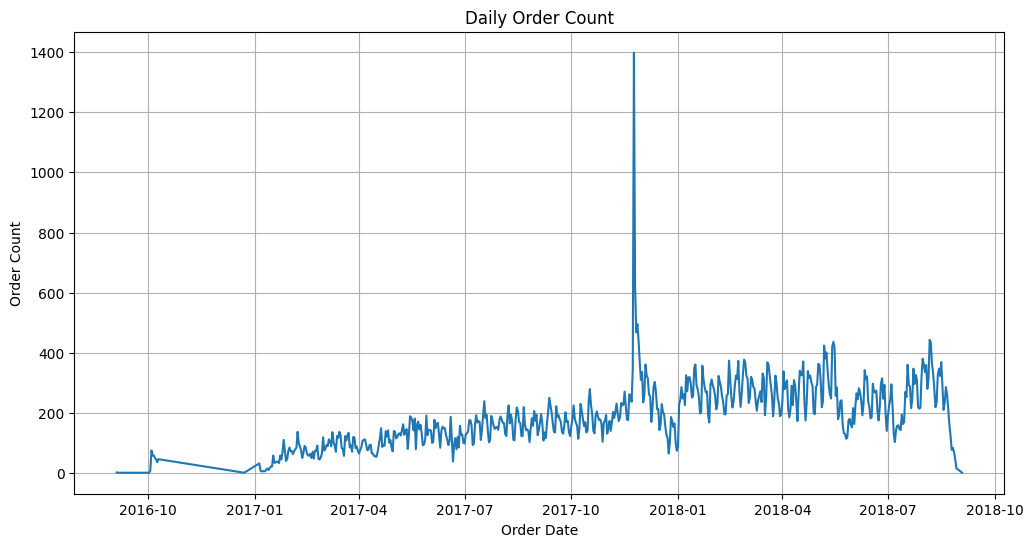

In [87]:
# Group by order date and count orders
daily_orders = df_eda.groupby(df_eda['order_purchase_timestamp'].dt.date)['order_id'].count().reset_index()

# Rename columns for clarity
daily_orders.columns = ['order_date', 'order_count']

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_orders['order_date'], daily_orders['order_count'])
plt.xlabel('Order Date')
plt.ylabel('Order Count')
plt.title('Daily Order Count')
plt.grid(True)
plt.show()

                     Category  Total Sales
43              health_beauty   1290883.52
70              watches_gifts   1245783.11
7              bed_bath_table   1095770.05
65             sports_leisure   1022489.29
15      computers_accessories    944992.54
..                        ...          ...
35                    flowers      1000.24
46             home_comfort_2       734.47
11          cds_dvds_musicals       730.00
29  fashion_childrens_clothes       569.85
61      security_and_services       283.29

[71 rows x 2 columns]


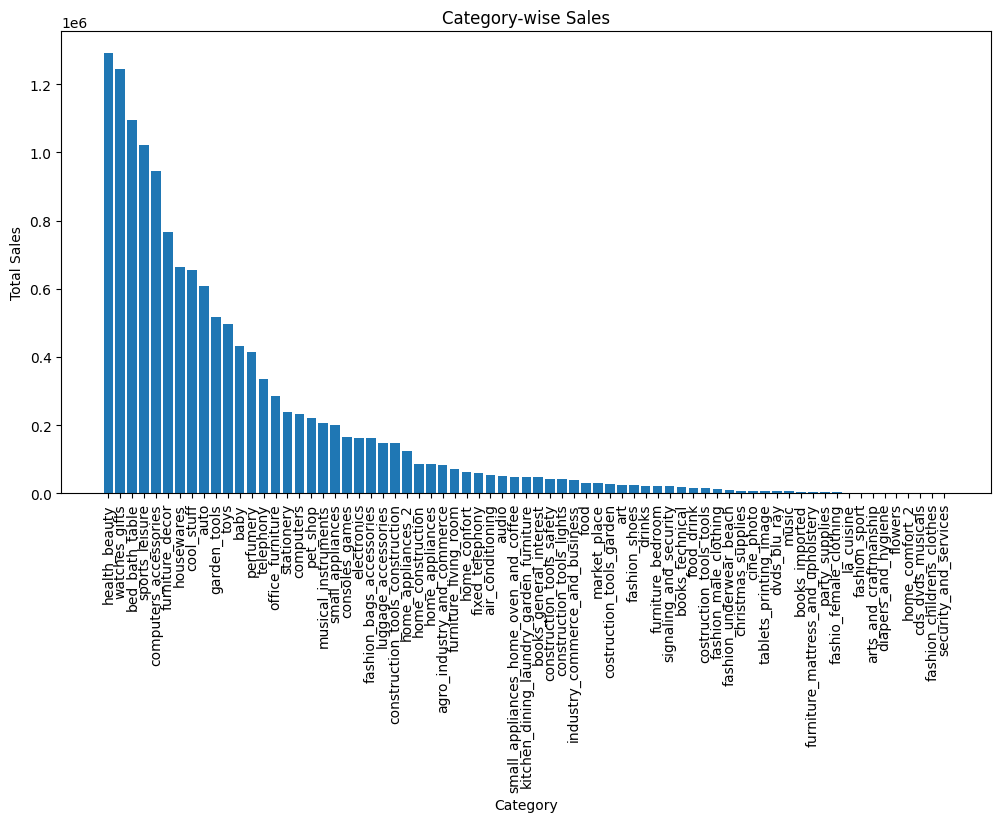

In [89]:
# Group by product category and sum sales
category_sales = df_eda.groupby('product_category_name_english')['price'].sum().reset_index()

# Rename columns for clarity
category_sales.columns = ['Category', 'Total Sales']

# Sort by sales in descending order
category_sales = category_sales.sort_values(by=['Total Sales'], ascending=False)

# Display the results
print(category_sales)

# Create a bar chart for visualization
plt.figure(figsize=(12, 6))
plt.bar(category_sales['Category'], category_sales['Total Sales'])
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Category-wise Sales')
plt.xticks(rotation=90)
plt.show()

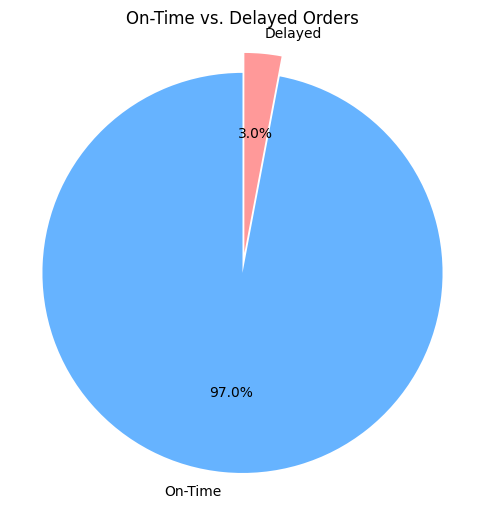

In [94]:
# Assuming 'order_status' column in orders_df indicates order status
# and 'delivered' represents on-time orders, while other statuses represent delayed orders

# Calculate the count of on-time and delayed orders
on_time_count = orders_df[orders_df['order_status'] == 'delivered']['order_id'].count()
delayed_count = orders_df[orders_df['order_status'] != 'delivered']['order_id'].count()

# Create the pie chart
labels = ['On-Time', 'Delayed']
sizes = [on_time_count, delayed_count]
colors = ['#66b3ff', '#ff9999']  # Customize colors if desired
explode = (0.1, 0)  # Explode the first slice (On-Time) for emphasis

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('On-Time vs. Delayed Orders')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

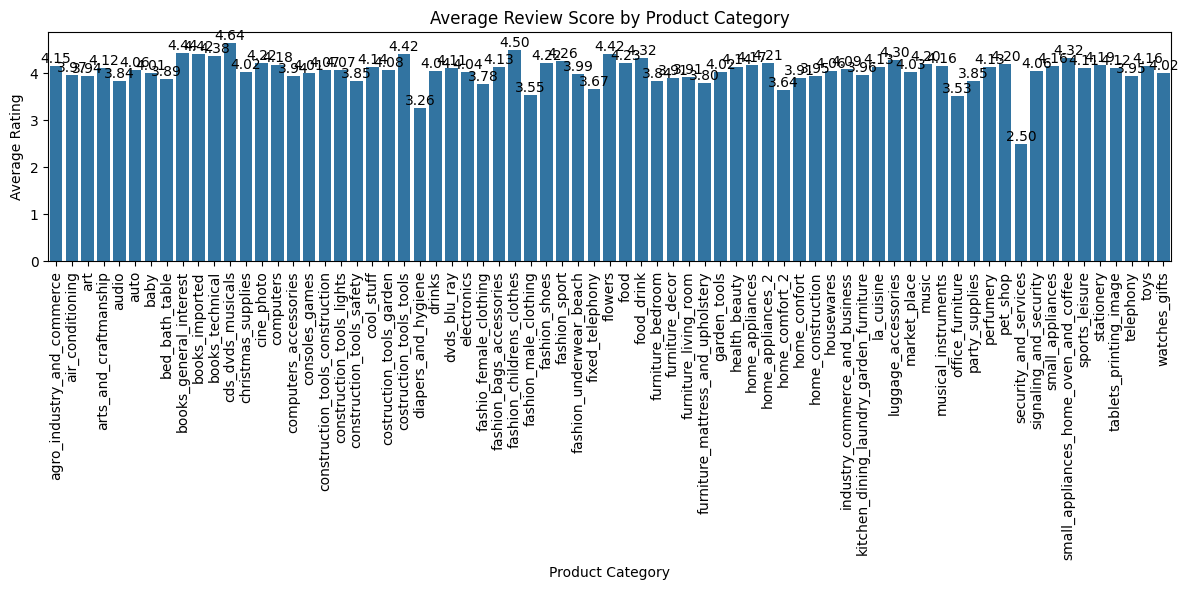

In [99]:
avg_review_score = df_eda.groupby('product_category_name_english')['review_score'].mean().reset_index()
avg_review_score.columns = ['Category', 'Rating']

plt.figure(figsize=(12, 6))
bars = sns.barplot(x='Category', y='Rating', data=avg_review_score)

# Adding titles and labels
plt.title('Average Review Score by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Rating')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add value labels
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.2f'),
                  (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                  ha='center', va='bottom')

plt.tight_layout()
plt.show()

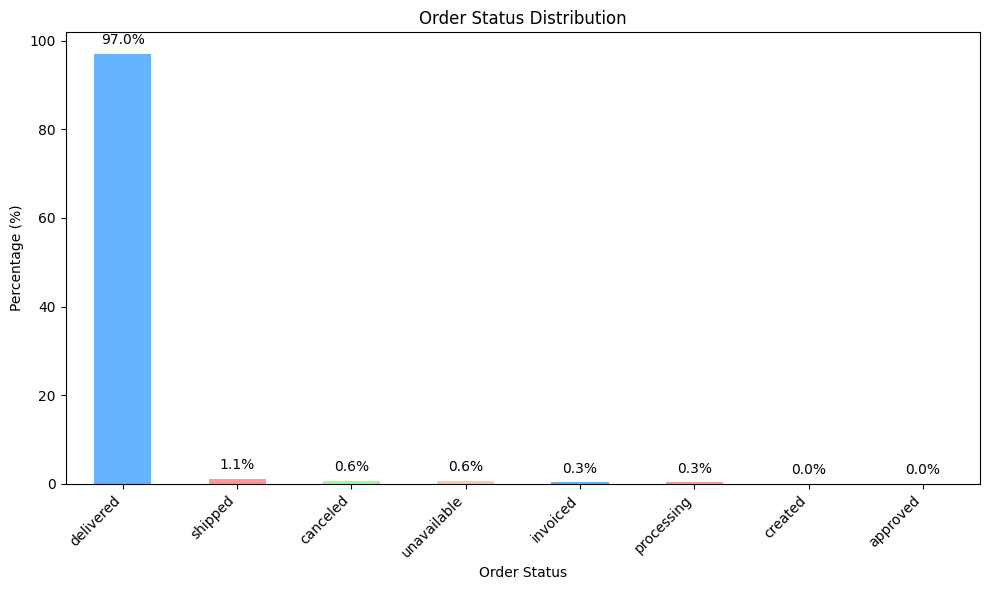

In [102]:
# Calculate order status percentages
order_status_counts = df_eda['order_status'].value_counts(normalize=True) * 100

# Create the bar chart
plt.figure(figsize=(10, 6))
ax = order_status_counts.plot(kind='bar', color=['#66b3ff', '#ff9999', '#99ff99', '#ffcc99'])  # Customize colors if desired
plt.xlabel('Order Status')
plt.ylabel('Percentage (%)')
plt.title('Order Status Distribution')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

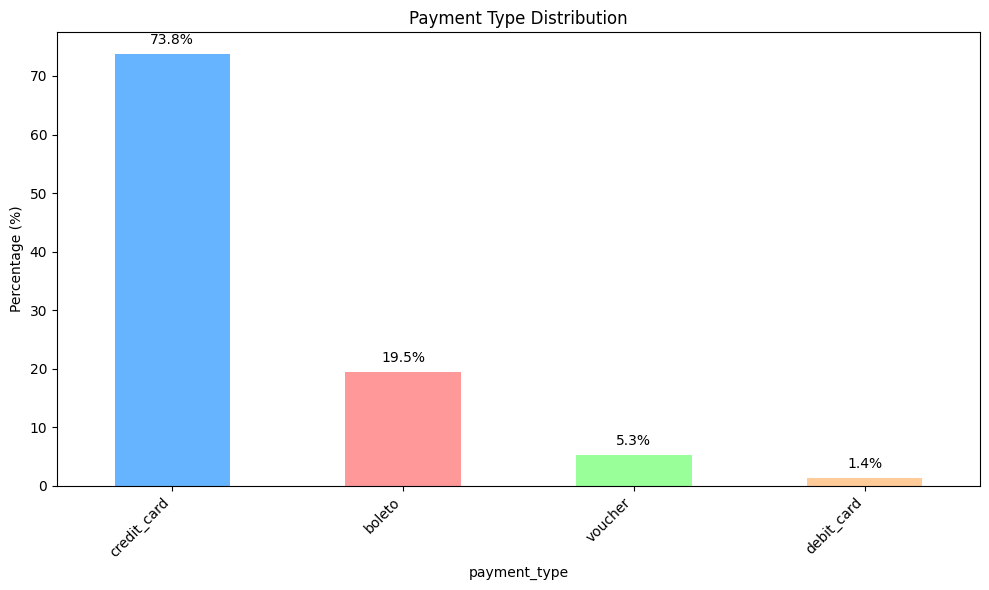

In [104]:
payment_type = df_eda['payment_type'].value_counts(normalize=True) * 100
# Create the bar chart
plt.figure(figsize=(10, 6))
ax = payment_type.plot(kind='bar', color=['#66b3ff', '#ff9999', '#99ff99', '#ffcc99'])  # Customize colors if desired
plt.xlabel('payment_type')
plt.ylabel('Percentage (%)')
plt.title('Payment Type Distribution')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

<Figure size 1000x600 with 0 Axes>

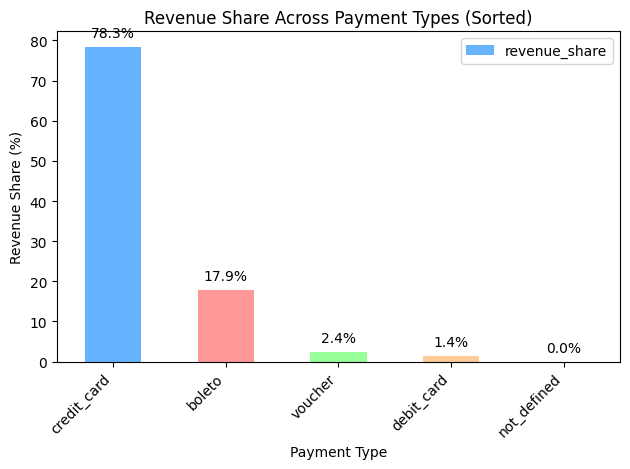

In [116]:
# Group by payment type and sum payment values
payment_revenue = df_eda.groupby('payment_type')['payment_value'].sum().reset_index()

# Calculate revenue share percentages
total_revenue = payment_revenue['payment_value'].sum()
payment_revenue['revenue_share'] = (payment_revenue['payment_value'] / total_revenue) * 100

# Sort by revenue share in descending order
payment_revenue = payment_revenue.sort_values(by=['revenue_share'], ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
ax = payment_revenue.plot(kind='bar', x='payment_type', y='revenue_share', color=['#66b3ff', '#ff9999', '#99ff99', '#ffcc99'])
plt.xlabel('Payment Type')
plt.ylabel('Revenue Share (%)')
plt.title('Revenue Share Across Payment Types (Sorted)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


 *   Examine the price distribution, focusing on low and high values (Completed)
*    Canccelation across payment channels





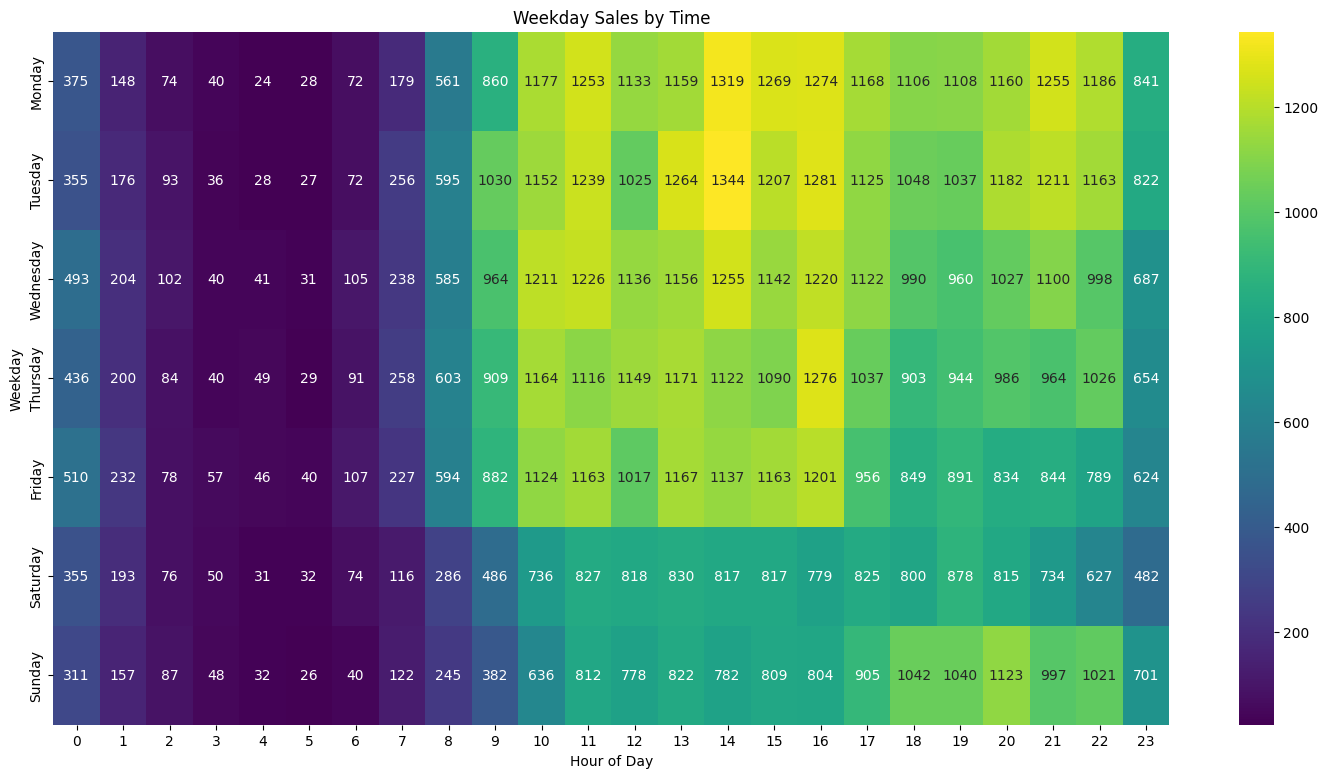

In [124]:
# Convert order purchase timestamp to datetime
df_eda['order_purchase_timestamp'] = pd.to_datetime(df_eda['order_purchase_timestamp'])

# Extract weekday and hour from the timestamp
df_eda['weekday'] = df_eda['order_purchase_timestamp'].dt.day_name()
df_eda['hour'] = df_eda['order_purchase_timestamp'].dt.hour

# Group by weekday and hour, then count orders
weekday_hour_sales = df_eda.groupby(['weekday', 'hour'])['order_id'].count().reset_index()

# Pivot the data to create a matrix for the heatmap
heatmap_data = weekday_hour_sales.pivot(index='weekday', columns='hour', values='order_id')

# Order weekdays and hours for better visualization
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(index=weekday_order)

# Create the heatmap
plt.figure(figsize=(18,9))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d')  # Customize cmap and annot as needed
plt.xlabel('Hour of Day')
plt.ylabel('Weekday')
plt.title('Weekday Sales by Time')
plt.show()

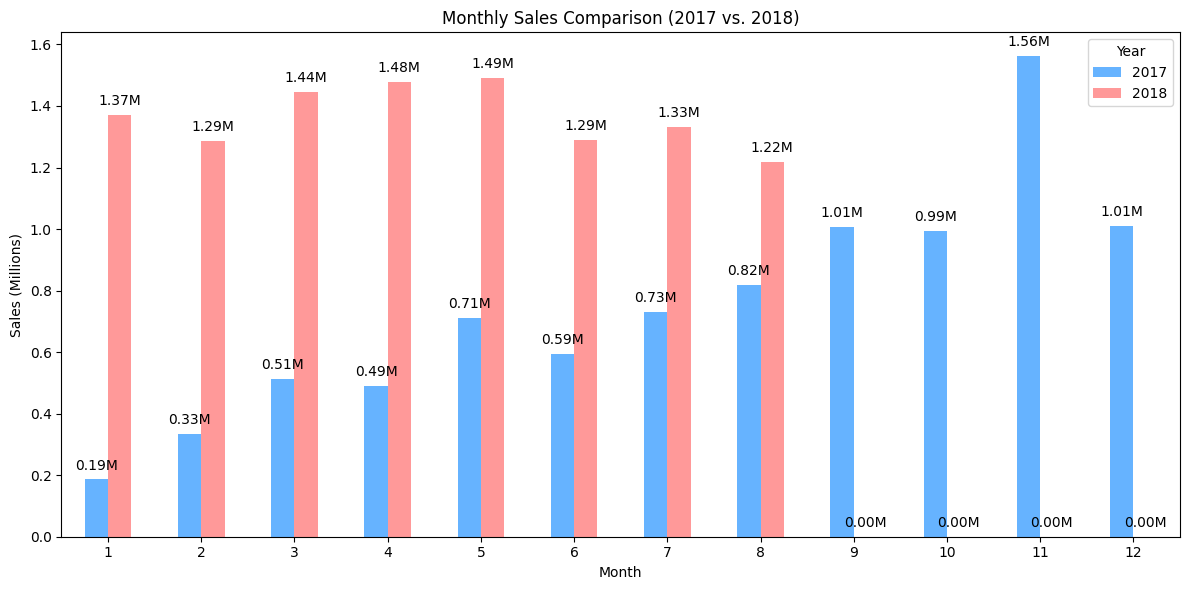

In [128]:
# Convert order purchase timestamp to datetime
df_eda['order_purchase_timestamp'] = pd.to_datetime(df_eda['order_purchase_timestamp'])

# Extract year and month from the timestamp
df_eda['year'] = df_eda['order_purchase_timestamp'].dt.year
df_eda['month'] = df_eda['order_purchase_timestamp'].dt.month

# Filter data for 2017 and 2018
sales_2017_2018 = df_eda[(df_eda['year'] == 2017) | (df_eda['year'] == 2018)]

# Group by year, month, and sum payment values
monthly_sales = sales_2017_2018.groupby(['year', 'month'])['payment_value'].sum().reset_index()

# Pivot the data for the bar chart
monthly_sales = monthly_sales.pivot(index='month', columns='year', values='payment_value')

# Convert sales to millions
monthly_sales = monthly_sales / 1000000

# Create the multi-bar chart
ax = monthly_sales.plot(kind='bar', figsize=(12, 6), color=['#66b3ff', '#ff9999'])  # Customize colors as needed
plt.xlabel('Month')
plt.ylabel('Sales (Millions)')
plt.title('Monthly Sales Comparison (2017 vs. 2018)')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.tight_layout()

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

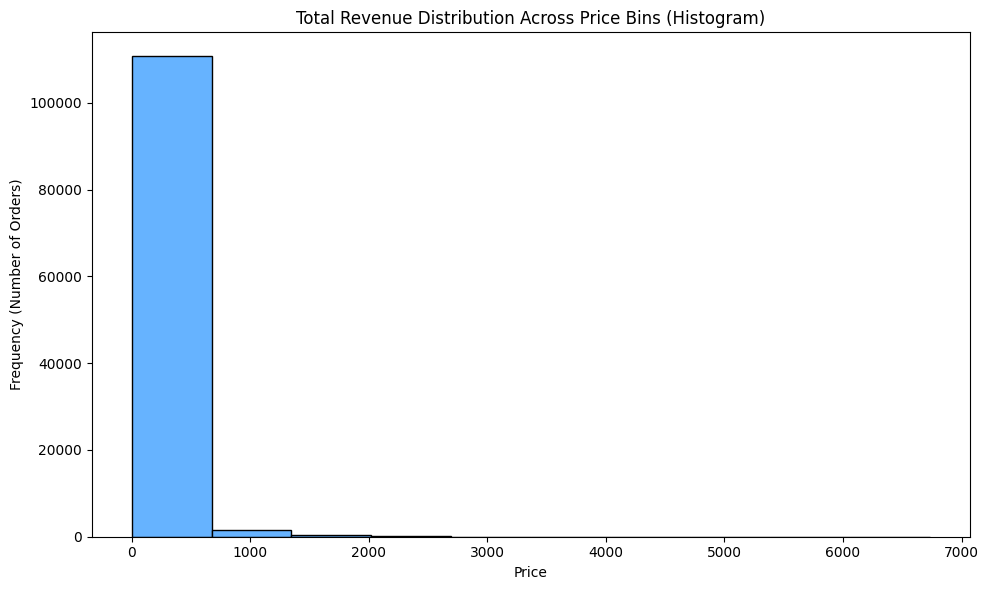

In [126]:
# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_eda['price'], bins=10, color='#66b3ff', edgecolor='black')  # Customize color and edgecolor as needed
plt.xlabel('Price')
plt.ylabel('Frequency (Number of Orders)')  # Or 'Total Revenue' if you want to show revenue instead of frequency
plt.title('Total Revenue Distribution Across Price Bins (Histogram)')
plt.tight_layout()
plt.show()

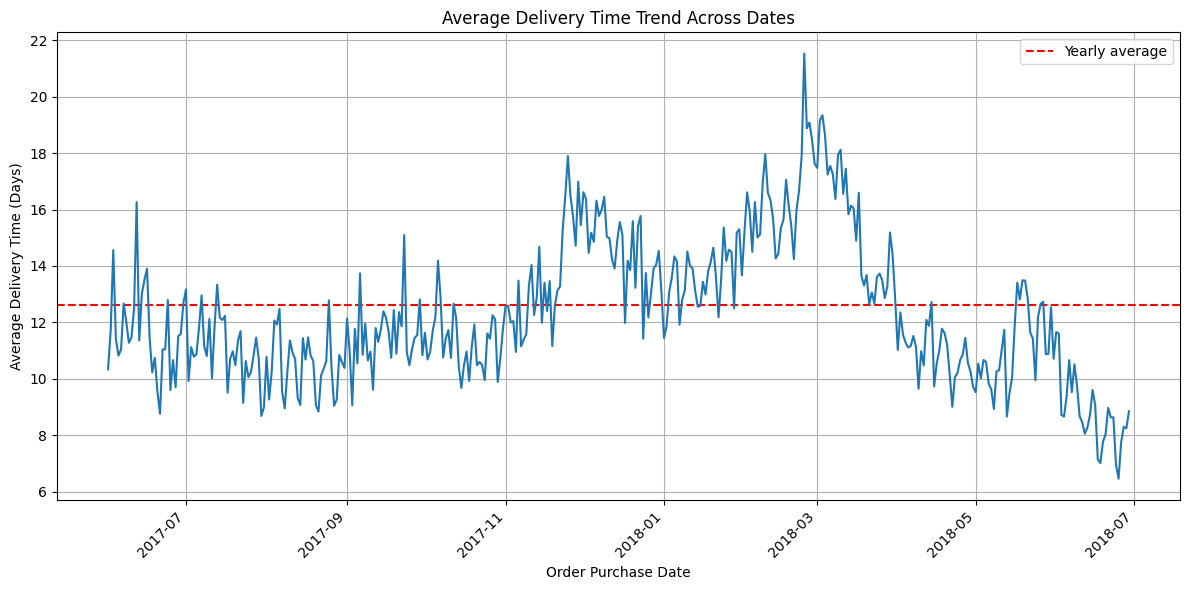

In [137]:
# Calculate delivery time in days

df_eda['delivery_time'] = (df_eda['order_delivered_customer_date'] - df_eda['order_purchase_timestamp']).dt.days

# filtering the dates
start_date = '2017-06-01'
end_date = '2018-06-30'
filtered_df = df_eda[(df_eda['order_purchase_timestamp'] >= start_date) & (df_eda['order_purchase_timestamp'] <= end_date)]

# Group by order purchase date and calculate average delivery time
average_delivery_by_date = filtered_df.groupby(filtered_df['order_purchase_timestamp'].dt.date)['delivery_time'].mean().reset_index()

# Create the line chart
plt.figure(figsize=(12, 6))
yearly_avg = filtered_df['delivery_time'].mean()
plt.axhline(y=yearly_avg, color='r', linestyle='--', label='Yearly average')
plt.plot(average_delivery_by_date['order_purchase_timestamp'], average_delivery_by_date['delivery_time'], linestyle='-')
plt.xlabel('Order Purchase Date')
plt.ylabel('Average Delivery Time (Days)')
plt.title('Average Delivery Time Trend Across Dates')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()

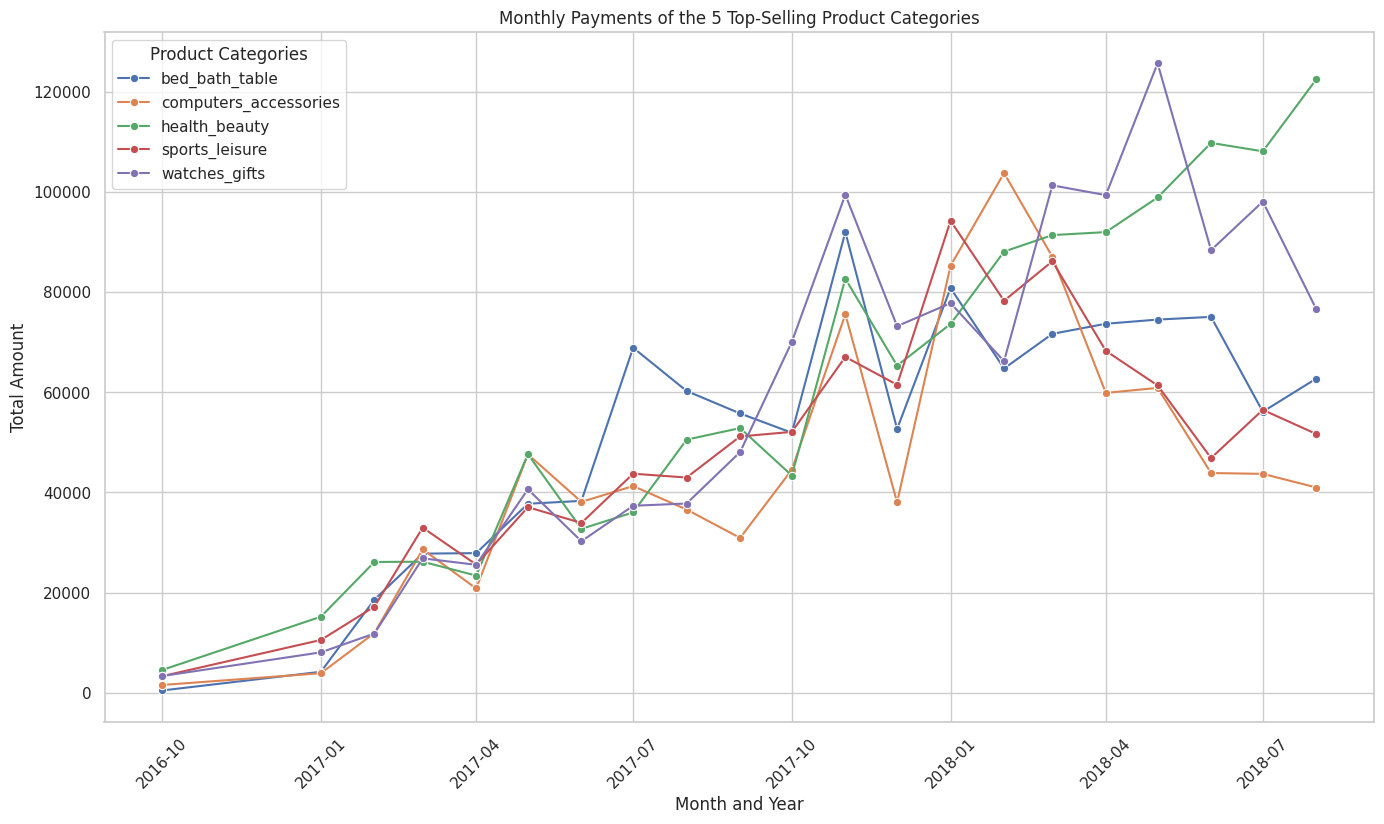

In [157]:
# Ensure order_purchase_timestamp is in datetime format
df_eda['order_purchase_timestamp'] = pd.to_datetime(df_eda['order_purchase_timestamp'], errors='coerce')

# Drop NaT values in the timestamp column
df_eda = df_eda.dropna(subset=['order_purchase_timestamp'])

# Create a new column for year and month
df_eda['year_month'] = df_eda['order_purchase_timestamp'].dt.to_period('M')

# Group by year_month and product_category_name_english, summing the price
df_grouped = df_eda.groupby(['year_month', 'product_category_name_english']).agg({'price': 'sum'}).reset_index()

# Calculate total sales per category
total_sales_per_category = df_grouped.groupby('product_category_name_english')['price'].sum()

# Get the top 5 categories based on total sales
top_5_categories = total_sales_per_category.nlargest(5).index

# Filter the grouped DataFrame for the top 5 categories
df_top_5 = df_grouped[df_grouped['product_category_name_english'].isin(top_5_categories)]

# Convert 'year_month' to timestamp for Seaborn compatibility
df_top_5['year_month'] = df_top_5['year_month'].dt.to_timestamp() # Convert Period to Timestamp

# Set the plot style
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_top_5, x='year_month', y='price', hue='product_category_name_english', marker='o', linestyle='-')

plt.title('Monthly Payments of the 5 Top-Selling Product Categories')
plt.xlabel('Month and Year')
plt.ylabel('Total Amount')

plt.legend(title='Product Categories')
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()

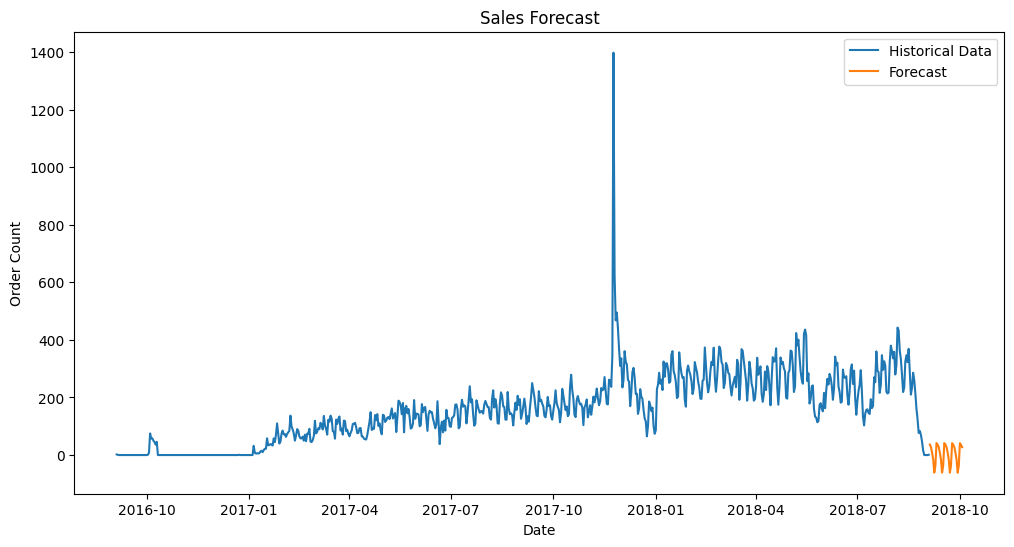

In [95]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming 'daily_orders' DataFrame has 'order_date' and 'order_count' columns

# Prepare data for forecasting
daily_orders = daily_orders.set_index('order_date')
daily_orders = daily_orders.asfreq('D')  # Set frequency to daily
daily_orders = daily_orders.fillna(0)  # Fill missing values with 0

# Create and fit the forecasting model
model = ExponentialSmoothing(daily_orders['order_count'], trend='add', seasonal='add', seasonal_periods=7)
model_fit = model.fit()

# Forecast for the next 30 days
forecast = model_fit.forecast(30)

# Plot the historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_orders['order_count'], label='Historical Data')
plt.plot(forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Order Count')
plt.title('Sales Forecast')
plt.legend()
plt.show()